In [14]:
import pandas as pd
import numpy as np

In [2]:
A = pd.read_excel('A.xlsx')

In [4]:
B = pd.read_excel('B.xlsx')

In [5]:
C = pd.read_excel('C.xlsx')

In [6]:
A

,col0,col1,col2,col3,col4
0,AA,BA,CA,DA,EA
1,AB,BB,CB,DB,EB
2,AC,BC,CC,DC,EC
3,AD,BD,CD,DD,ED
4,AE,BE,CE,DE,EE


In [7]:
B

,C0,C1,C2,C3,C4,C5,C6
0,0A,1A,2A,3A,4A,5A,6A
1,0B,1B,2B,3B,4B,5B,6B
2,0C,1C,2C,3C,4C,5C,6C
3,0D,1D,2D,3D,4D,5D,6D
4,0E,1E,2E,3E,4E,5E,6E


In [8]:
C

,c1,c2,c3,c4,c5
0,10,20,30,40,50
1,11,21,31,41,51
2,12,22,32,42,52
3,13,23,33,43,53
4,14,24,34,44,54
5,15,25,35,45,55
6,16,26,36,46,56
7,17,27,37,47,57
8,18,28,38,48,58
9,19,29,39,49,59


In [10]:
adult  = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                     names = ['age','workclass','fnlwgt', 'education',
                              'education_num','marital_status','occupation','relationship','race',
                              'sex','capital_gain','capital_loss', 'hours_per_week', 'native_country','label'],
                     index_col = False)
print("Shape of data{}".format(adult.shape))
adult.head()

Shape of data(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
print('Unique values of label before replacemente {}'.format(adult['label'].unique()))


Unique values of label before replacemente [' <=50K' ' >50K']


In [12]:
adult['label'].unique()

array([' <=50K', ' >50K'], dtype=object)

creation of a new column: 'label_50':

In [15]:
adult['label_50'] = np.where(adult['label'] == ' <=50K', 0, 1) # replacement of label values

In [18]:
print('label values count after replacement\n{}'.format(adult['label_50'].value_counts()))

label values count after replacement
0    24720
1     7841
Name: label_50, dtype: int64


In [21]:
pt = adult.pivot_table(index = 'occupation', columns = 'sex', values = 'label_50', aggfunc=['sum'])
pt

sum        
sex                 Female    Male
occupation                        
 ?                    52.0   139.0
 Adm-clerical        212.0   295.0
 Armed-Forces          NaN     1.0
 Craft-repair         20.0   909.0
 Exec-managerial     280.0  1688.0
 Farming-fishing       2.0   113.0
 Handlers-cleaners     4.0    82.0
 Machine-op-inspct    20.0   230.0
 Other-service        51.0    86.0
 Priv-house-serv       1.0     0.0
 Prof-specialty      385.0  1474.0
 Protective-serv      10.0   201.0
 Sales                88.0   895.0
 Tech-support         45.0   238.0
 Transport-moving      9.0   311.0

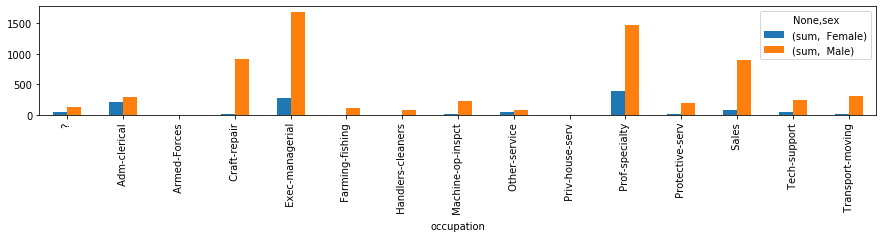

In [25]:
pt.plot(kind='bar', figsize=(15,2));

In [27]:
pt2 = adult.pivot_table(index='occupation', columns=['marital_status', 'sex'], values='label_50', aggfunc='sum')
pt2

marital_status      Divorced        Married-AF-spouse        \
sex                   Female  Male             Female  Male   
occupation                                                    
 ?                       4.0   2.0                0.0   NaN   
 Adm-clerical           15.0  11.0                1.0   0.0   
 Armed-Forces            NaN   NaN                NaN   NaN   
 Craft-repair            7.0  38.0                1.0   1.0   
 Exec-managerial        66.0  77.0                1.0   NaN   
 Farming-fishing         1.0   4.0                NaN   1.0   
 Handlers-cleaners       0.0   4.0                NaN   NaN   
 Machine-op-inspct       1.0   3.0                NaN   NaN   
 Other-service           6.0   5.0                2.0   NaN   
 Priv-house-serv         0.0   NaN                NaN   NaN   
 Prof-specialty         57.0  63.0                1.0   2.0   
 Protective-serv         2.0  11.0                NaN   0.0   
 Sales                  15.0  40.0                0.0   0.0   
 Tech-support            4.0  13.0                NaN   NaN   
 Transport-moving        1.0  13.0                NaN   0.0   

marital_status      Married-civ-spouse          Married-spouse-absent        \
sex                             Female    Male                 Female  Male   
occupation                                                                    
 ?                                42.0   129.0                    0.0   1.0   
 Adm-clerical                    171.0   264.0                    1.0   1.0   
 Armed-Forces                      NaN     1.0                    NaN   NaN   
 Craft-repair                     10.0   823.0                    0.0   4.0   
 Exec-managerial                 155.0  1511.0                    3.0   5.0   
 Farming-fishing                   0.0   101.0                    1.0   0.0   
 Handlers-cleaners                 4.0    75.0                    0.0   0.0   
 Machine-op-inspct                17.0   222.0                    0.0   1.0   
 Other-service                    32.0    72.0                    1.0   1.0   
 Priv-house-serv                   0.0     0.0                    0.0   NaN   
 Prof-specialty                  231.0  1276.0                    3.0   8.0   
 Protective-serv                   2.0   179.0                    0.0   0.0   
 Sales                            50.0   790.0                    2.0   1.0   
 Tech-support                     33.0   211.0                    0.0   0.0   
 Transport-moving                  7.0   284.0                    0.0   1.0   

marital_status      Never-married         Separated        Widowed        
sex                        Female   Male     Female  Male   Female  Male  
occupation                                                                
 ?                            2.0    7.0        0.0   0.0      4.0   0.0  
 Adm-clerical                17.0   16.0        1.0   2.0      6.0   1.0  
 Armed-Forces                 NaN    0.0        NaN   NaN      NaN   NaN  
 Craft-repair                 2.0   33.0        0.0   6.0      0.0   4.0  
 Exec-managerial             42.0   70.0        3.0  16.0     10.0   9.0  
 Farming-fishing              0.0    5.0        0.0   1.0      0.0   1.0  
 Handlers-cleaners            0.0    2.0        0.0   0.0      0.0   1.0  
 Machine-op-inspct            2.0    3.0        0.0   1.0      0.0   0.0  
 Other-service                5.0    7.0        1.0   1.0      4.0   0.0  
 Priv-house-serv              0.0    0.0        0.0   NaN      1.0   NaN  
 Prof-specialty              72.0  105.0       11.0  11.0     10.0   9.0  
 Protective-serv              6.0    9.0        0.0   1.0      0.0   1.0  
 Sales                       10.0   50.0        1.0   4.0     10.0  10.0  
 Tech-support                 7.0   10.0        0.0   3.0      1.0   1.0  
 Transport-moving             1.0    8.0        0.0   3.0      0.0   2.0

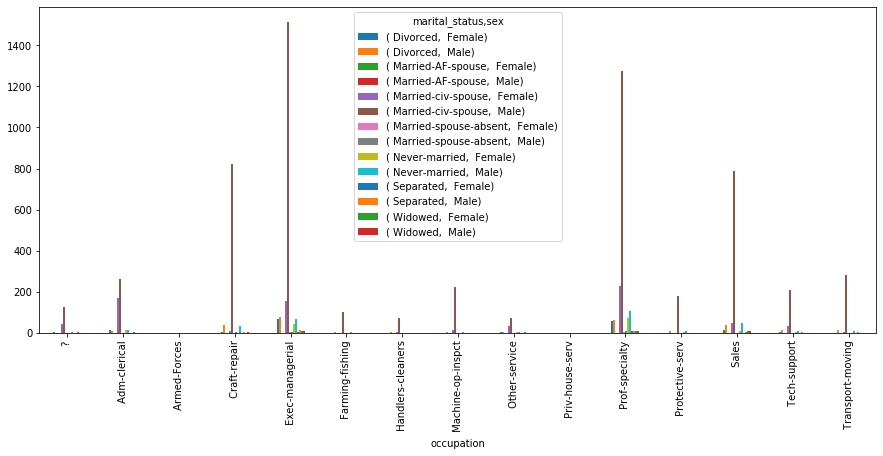

In [31]:
pt2.plot(kind='bar', figsize=(15,6))

In [32]:
pt.index

Index([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'],
      dtype='object', name='occupation')

In [33]:
pt.columns

MultiIndex([('sum', ' Female'),
            ('sum',   ' Male')],
           names=[None, 'sex'])

In [34]:
pt

sum        
sex                 Female    Male
occupation                        
 ?                    52.0   139.0
 Adm-clerical        212.0   295.0
 Armed-Forces          NaN     1.0
 Craft-repair         20.0   909.0
 Exec-managerial     280.0  1688.0
 Farming-fishing       2.0   113.0
 Handlers-cleaners     4.0    82.0
 Machine-op-inspct    20.0   230.0
 Other-service        51.0    86.0
 Priv-house-serv       1.0     0.0
 Prof-specialty      385.0  1474.0
 Protective-serv      10.0   201.0
 Sales                88.0   895.0
 Tech-support         45.0   238.0
 Transport-moving      9.0   311.0

In [ ]:
pt2_copy = pt2.copy()

In [36]:
pt2_copy.columns = pt2_copy.columns.map('_'.join)

In [39]:
pt2.head(1)

marital_status  Divorced        Married-AF-spouse        Married-civ-spouse  \
sex               Female  Male             Female  Male              Female   
occupation                                                                    
 ?                   4.0   2.0                0.0   NaN                42.0   

marital_status         Married-spouse-absent        Never-married        \
sex              Male                 Female  Male         Female  Male   
occupation                                                                
 ?              129.0                    0.0   1.0            2.0   7.0   

marital_status  Separated        Widowed        
sex                Female  Male   Female  Male  
occupation                                      
 ?                    0.0   0.0      4.0   0.0

In [38]:
pt2_copy.head(1)

,Divorced_ Female,Divorced_ Male,Married-AF-spouse_ Female,Married-AF-spouse_ Male,Married-civ-spouse_ Female,Married-civ-spouse_ Male,Married-spouse-absent_ Female,Married-spouse-absent_ Male,Never-married_ Female,Never-married_ Male,Separated_ Female,Separated_ Male,Widowed_ Female,Widowed_ Male
occupation,,,,,,,,,,,,,,
?,4.0,2.0,0.0,NaN,42.0,129.0,0.0,1.0,2.0,7.0,0.0,0.0,4.0,0.0
